In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("Churn.csv")

In [5]:
df

Unnamed: 0 state      area.code  account.length voice.plan  \
0              1    KS  area_code_415             128        yes   
1              2    OH  area_code_415             107        yes   
2              3    NJ  area_code_415             137         no   
3              4    OH  area_code_408              84         no   
4              5    OK  area_code_415              75         no   
...          ...   ...            ...             ...        ...   
4995        4996    HI  area_code_408              50        yes   
4996        4997    WV  area_code_415             152         no   
4997        4998    DC  area_code_415              61         no   
4998        4999    DC  area_code_510             109         no   
4999        5000    VT  area_code_415              86        yes   

      voice.messages intl.plan  intl.mins  intl.calls  intl.charge  ...  \
0                 25        no       10.0           3         2.70  ...   
1                 26        no       13.7           3         3.70  ...   
2                  0        no       12.2           5         3.29  ...   
3                  0       yes        6.6           7         1.78  ...   
4                  0       yes       10.1           3         2.73  ...   
...              ...       ...        ...         ...          ...  ...   
4995              40        no        9.9           5         2.67  ...   
4996               0        no       14.7           2         3.97  ...   
4997               0        no       13.6           4         3.67  ...   
4998               0        no        8.5           6         2.30  ...   
4999              34        no        9.3          16         2.51  ...   

      day.calls  day.charge eve.mins eve.calls  eve.charge  night.mins  \
0           110       45.07    197.4        99       16.78       244.7   
1           123       27.47    195.5       103       16.62       254.4   
2           114       41.38    121.2       110       10.30       162.6   
3            71        50.9     61.9        88        5.26       196.9   
4           113       28.34    148.3       122       12.61       186.9   
...         ...         ...      ...       ...         ...         ...   
4995        127       40.07      223       126       18.96       297.5   
4996         90       31.31    256.8        73       21.83       213.6   
4997         89        23.9    172.8       128       14.69       212.4   
4998         67        32.1    171.7        92       14.59       224.4   
4999        102          22    267.1       104       22.70       154.8   

      night.calls  night.charge  customer.calls  churn  
0              91         11.01               1     no  
1             103         11.45               1     no  
2             104          7.32               0     no  
3              89          8.86               2     no  
4             121          8.41               3     no  
...           ...           ...             ...    ...  
4995          116         13.39               2     no  
4996          113          9.61               3    yes  
4997           97          9.56               1     no  
4998           89         10.10               0     no  
4999          100          6.97               0     no  

[5000 rows x 21 columns]

# EDA

In [6]:
df.shape

(5000, 21)

In [7]:
df.columns.values

array(['Unnamed: 0', 'state', 'area.code', 'account.length', 'voice.plan',
       'voice.messages', 'intl.plan', 'intl.mins', 'intl.calls',
       'intl.charge', 'day.mins', 'day.calls', 'day.charge', 'eve.mins',
       'eve.calls', 'eve.charge', 'night.mins', 'night.calls',
       'night.charge', 'customer.calls', 'churn'], dtype=object)

In [8]:
df.dtypes

Unnamed: 0          int64
state              object
area.code          object
account.length      int64
voice.plan         object
voice.messages      int64
intl.plan          object
intl.mins         float64
intl.calls          int64
intl.charge       float64
day.mins          float64
day.calls           int64
day.charge         object
eve.mins           object
eve.calls           int64
eve.charge        float64
night.mins        float64
night.calls         int64
night.charge      float64
customer.calls      int64
churn              object
dtype: object

In [9]:
df.isna().sum()

Unnamed: 0        0
state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [11]:
df.nunique()

Unnamed: 0        5000
state               51
area.code            3
account.length     218
voice.plan           2
voice.messages      48
intl.plan            2
intl.mins          170
intl.calls          21
intl.charge        170
day.mins          1961
day.calls          123
day.charge        1962
eve.mins          1877
eve.calls          126
eve.charge        1659
night.mins        1853
night.calls        131
night.charge      1028
customer.calls      10
churn                2
dtype: int64

<Figure size 432x288 with 0 Axes>

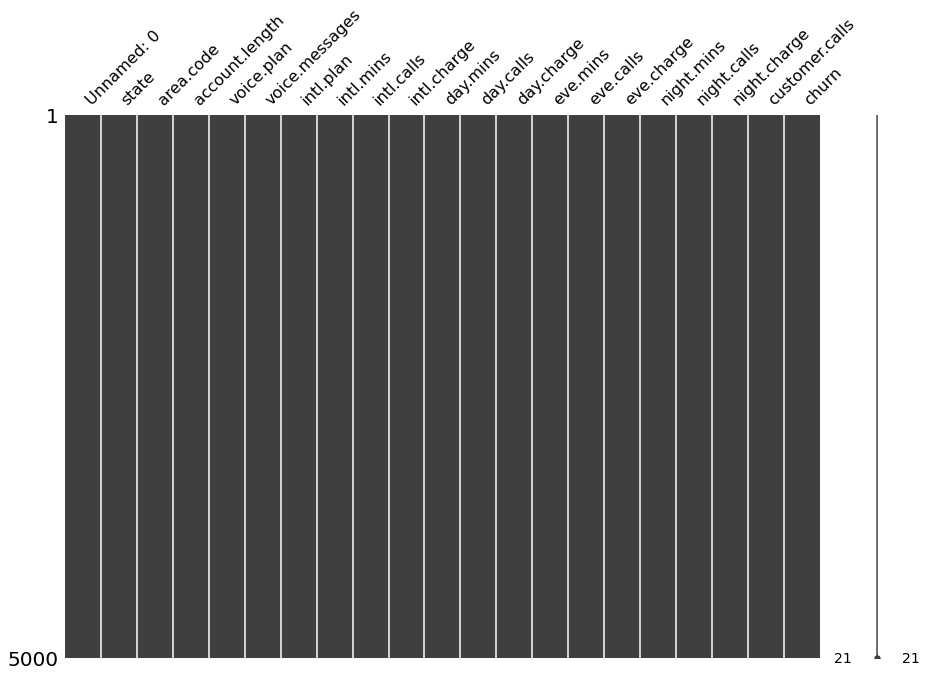

In [12]:
# Visually check for missing values using the missing library
import missingno as msno
import pandas as pd
plt.figure()

msno.matrix(df, figsize = (15,10))
plt.show()


Text(0.5, 1.0, 'Count of target variable per category')

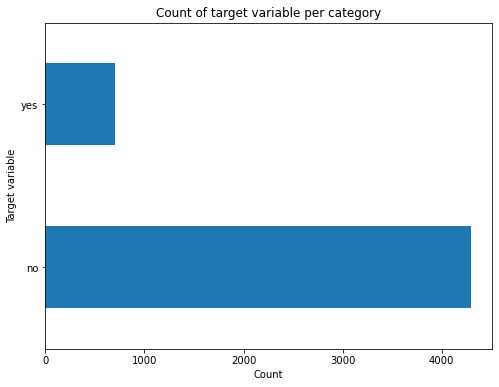

In [13]:
df['churn'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("Count")
plt.ylabel("Target variable")
plt.title("Count of target variable per category")

In [14]:
df["churn"].unique()

array(['no', 'yes'], dtype=object)

not_churned:  4293 ,churned: 707


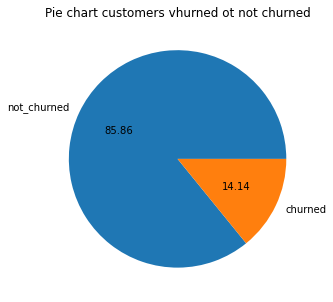

In [15]:
#checking imbalance data and visualize it using pie char
not_churned=df[df['churn']=='no']['churn'].count()
churned=df[df['churn']=='yes']['churn'].count()
print('not_churned: ', not_churned,',churned:', churned)

fig = plt.figure(figsize=(5,5))
plt.pie([not_churned,churned],labels=['not_churned','churned'],autopct='%.2f')
plt.title('Pie chart customers vhurned ot not churned')
plt.show()

In the acquisition of the visualization above, the percentage of customers who did not churn was 85.93% or a total of 3652 data while those who did churn were 14.07% or a total of 598 data. And this shows that the data portion between not_churned and churned is imbalanced data.

In [16]:
df['churn'].value_counts()

no     4293
yes     707
Name: churn, dtype: int64

In [17]:
100*df['churn'].value_counts()/len(df['churn'])

no     85.86
yes    14.14
Name: churn, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='count'>

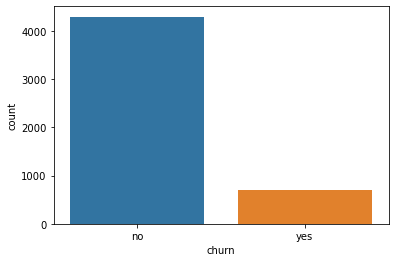

In [18]:
sns.countplot(x=df.churn)

In [19]:
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [20]:
df

Index state      area.code  account.length voice.plan  voice.messages  \
0         1    KS  area_code_415             128        yes              25   
1         2    OH  area_code_415             107        yes              26   
2         3    NJ  area_code_415             137         no               0   
3         4    OH  area_code_408              84         no               0   
4         5    OK  area_code_415              75         no               0   
...     ...   ...            ...             ...        ...             ...   
4995   4996    HI  area_code_408              50        yes              40   
4996   4997    WV  area_code_415             152         no               0   
4997   4998    DC  area_code_415              61         no               0   
4998   4999    DC  area_code_510             109         no               0   
4999   5000    VT  area_code_415              86        yes              34   

     intl.plan  intl.mins  intl.calls  intl.charge  ...  day.calls  \
0           no       10.0           3         2.70  ...        110   
1           no       13.7           3         3.70  ...        123   
2           no       12.2           5         3.29  ...        114   
3          yes        6.6           7         1.78  ...         71   
4          yes       10.1           3         2.73  ...        113   
...        ...        ...         ...          ...  ...        ...   
4995        no        9.9           5         2.67  ...        127   
4996        no       14.7           2         3.97  ...         90   
4997        no       13.6           4         3.67  ...         89   
4998        no        8.5           6         2.30  ...         67   
4999        no        9.3          16         2.51  ...        102   

      day.charge eve.mins eve.calls  eve.charge  night.mins  night.calls  \
0          45.07    197.4        99       16.78       244.7           91   
1          27.47    195.5       103       16.62       254.4          103   
2          41.38    121.2       110       10.30       162.6          104   
3           50.9     61.9        88        5.26       196.9           89   
4          28.34    148.3       122       12.61       186.9          121   
...          ...      ...       ...         ...         ...          ...   
4995       40.07      223       126       18.96       297.5          116   
4996       31.31    256.8        73       21.83       213.6          113   
4997        23.9    172.8       128       14.69       212.4           97   
4998        32.1    171.7        92       14.59       224.4           89   
4999          22    267.1       104       22.70       154.8          100   

      night.charge  customer.calls  churn  
0            11.01               1     no  
1            11.45               1     no  
2             7.32               0     no  
3             8.86               2     no  
4             8.41               3     no  
...            ...             ...    ...  
4995         13.39               2     no  
4996          9.61               3    yes  
4997          9.56               1     no  
4998         10.10               0     no  
4999          6.97               0     no  

[5000 rows x 21 columns]

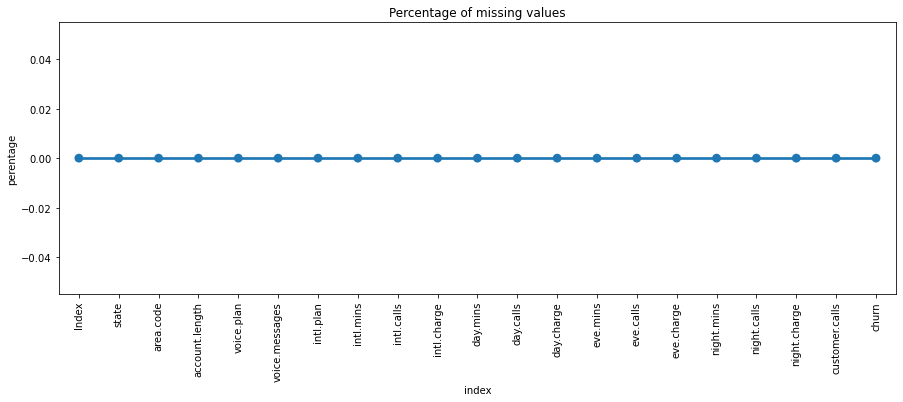

In [21]:
missing=pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(15,5))
ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90)
plt.title("Percentage of missing values")
plt.ylabel("perentage")
plt.show()

# Data cleaning

In [22]:
df['eve.mins']=pd.to_numeric(df['eve.mins'],errors='coerce')
df['day.charge']=pd.to_numeric(df['day.charge'],errors='coerce')

In [23]:
df.isnull().sum()

Index              0
state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

In [24]:
df=df.dropna()
df

Index state      area.code  account.length voice.plan  voice.messages  \
0         1    KS  area_code_415             128        yes              25   
1         2    OH  area_code_415             107        yes              26   
2         3    NJ  area_code_415             137         no               0   
3         4    OH  area_code_408              84         no               0   
4         5    OK  area_code_415              75         no               0   
...     ...   ...            ...             ...        ...             ...   
4995   4996    HI  area_code_408              50        yes              40   
4996   4997    WV  area_code_415             152         no               0   
4997   4998    DC  area_code_415              61         no               0   
4998   4999    DC  area_code_510             109         no               0   
4999   5000    VT  area_code_415              86        yes              34   

     intl.plan  intl.mins  intl.calls  intl.charge  ...  day.calls  \
0           no       10.0           3         2.70  ...        110   
1           no       13.7           3         3.70  ...        123   
2           no       12.2           5         3.29  ...        114   
3          yes        6.6           7         1.78  ...         71   
4          yes       10.1           3         2.73  ...        113   
...        ...        ...         ...          ...  ...        ...   
4995        no        9.9           5         2.67  ...        127   
4996        no       14.7           2         3.97  ...         90   
4997        no       13.6           4         3.67  ...         89   
4998        no        8.5           6         2.30  ...         67   
4999        no        9.3          16         2.51  ...        102   

      day.charge  eve.mins  eve.calls  eve.charge  night.mins  night.calls  \
0          45.07     197.4         99       16.78       244.7           91   
1          27.47     195.5        103       16.62       254.4          103   
2          41.38     121.2        110       10.30       162.6          104   
3          50.90      61.9         88        5.26       196.9           89   
4          28.34     148.3        122       12.61       186.9          121   
...          ...       ...        ...         ...         ...          ...   
4995       40.07     223.0        126       18.96       297.5          116   
4996       31.31     256.8         73       21.83       213.6          113   
4997       23.90     172.8        128       14.69       212.4           97   
4998       32.10     171.7         92       14.59       224.4           89   
4999       22.00     267.1        104       22.70       154.8          100   

      night.charge  customer.calls  churn  
0            11.01               1     no  
1            11.45               1     no  
2             7.32               0     no  
3             8.86               2     no  
4             8.41               3     no  
...            ...             ...    ...  
4995         13.39               2     no  
4996          9.61               3    yes  
4997          9.56               1     no  
4998         10.10               0     no  
4999          6.97               0     no  

[4969 rows x 21 columns]

In [25]:
df.describe()

Index  account.length  voice.messages    intl.mins   intl.calls  \
count  4969.000000     4969.000000     4969.000000  4969.000000  4969.000000   
mean   2508.523244      100.206681        7.754880    10.264198     4.433085   
std    1439.760538       39.695476       13.545738     2.761996     2.459495   
min       1.000000        1.000000        0.000000     0.000000     0.000000   
25%    1265.000000       73.000000        0.000000     8.500000     3.000000   
50%    2512.000000      100.000000        0.000000    10.300000     4.000000   
75%    3754.000000      127.000000       17.000000    12.000000     6.000000   
max    5000.000000      243.000000       52.000000    20.000000    20.000000   

       intl.charge     day.mins    day.calls   day.charge     eve.mins  \
count  4969.000000  4969.000000  4969.000000  4969.000000  4969.000000   
mean      2.771851   180.306178   100.021936    30.652604   200.617368   
std       0.745672    53.931206    19.835965     9.168275    50.550590   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.300000   143.700000    87.000000    24.430000   166.400000   
50%       2.780000   180.100000   100.000000    30.620000   201.000000   
75%       3.240000   216.200000   113.000000    36.750000   234.100000   
max       5.400000   351.500000   165.000000    59.760000   363.700000   

         eve.calls   eve.charge   night.mins  night.calls  night.charge  \
count  4969.000000  4969.000000  4969.000000  4969.000000   4969.000000   
mean    100.174884    17.052695   200.434675    99.954518      9.019670   
std      19.833572     4.296784    50.528158    19.959015      2.273776   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%      87.000000    14.140000   167.100000    87.000000      7.520000   
50%     100.000000    17.090000   200.400000   100.000000      9.020000   
75%     113.000000    19.900000   234.700000   113.000000     10.560000   
max     170.000000    30.910000   395.000000   175.000000     17.770000   

       customer.calls  
count     4969.000000  
mean         1.571946  
std          1.307458  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          2.000000  
max          9.000000

<AxesSubplot:>

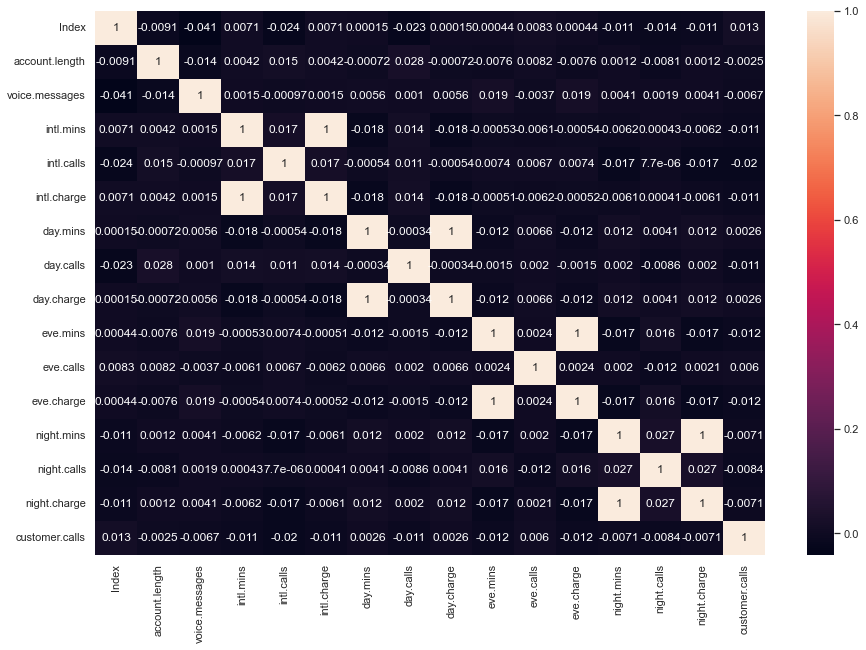

In [26]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(), annot= True)

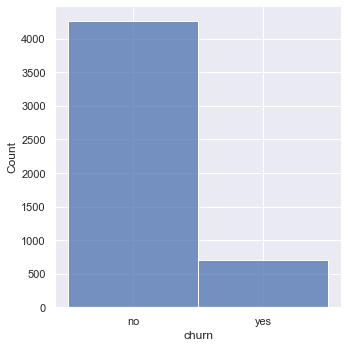

In [27]:
sns.displot(df['churn'])

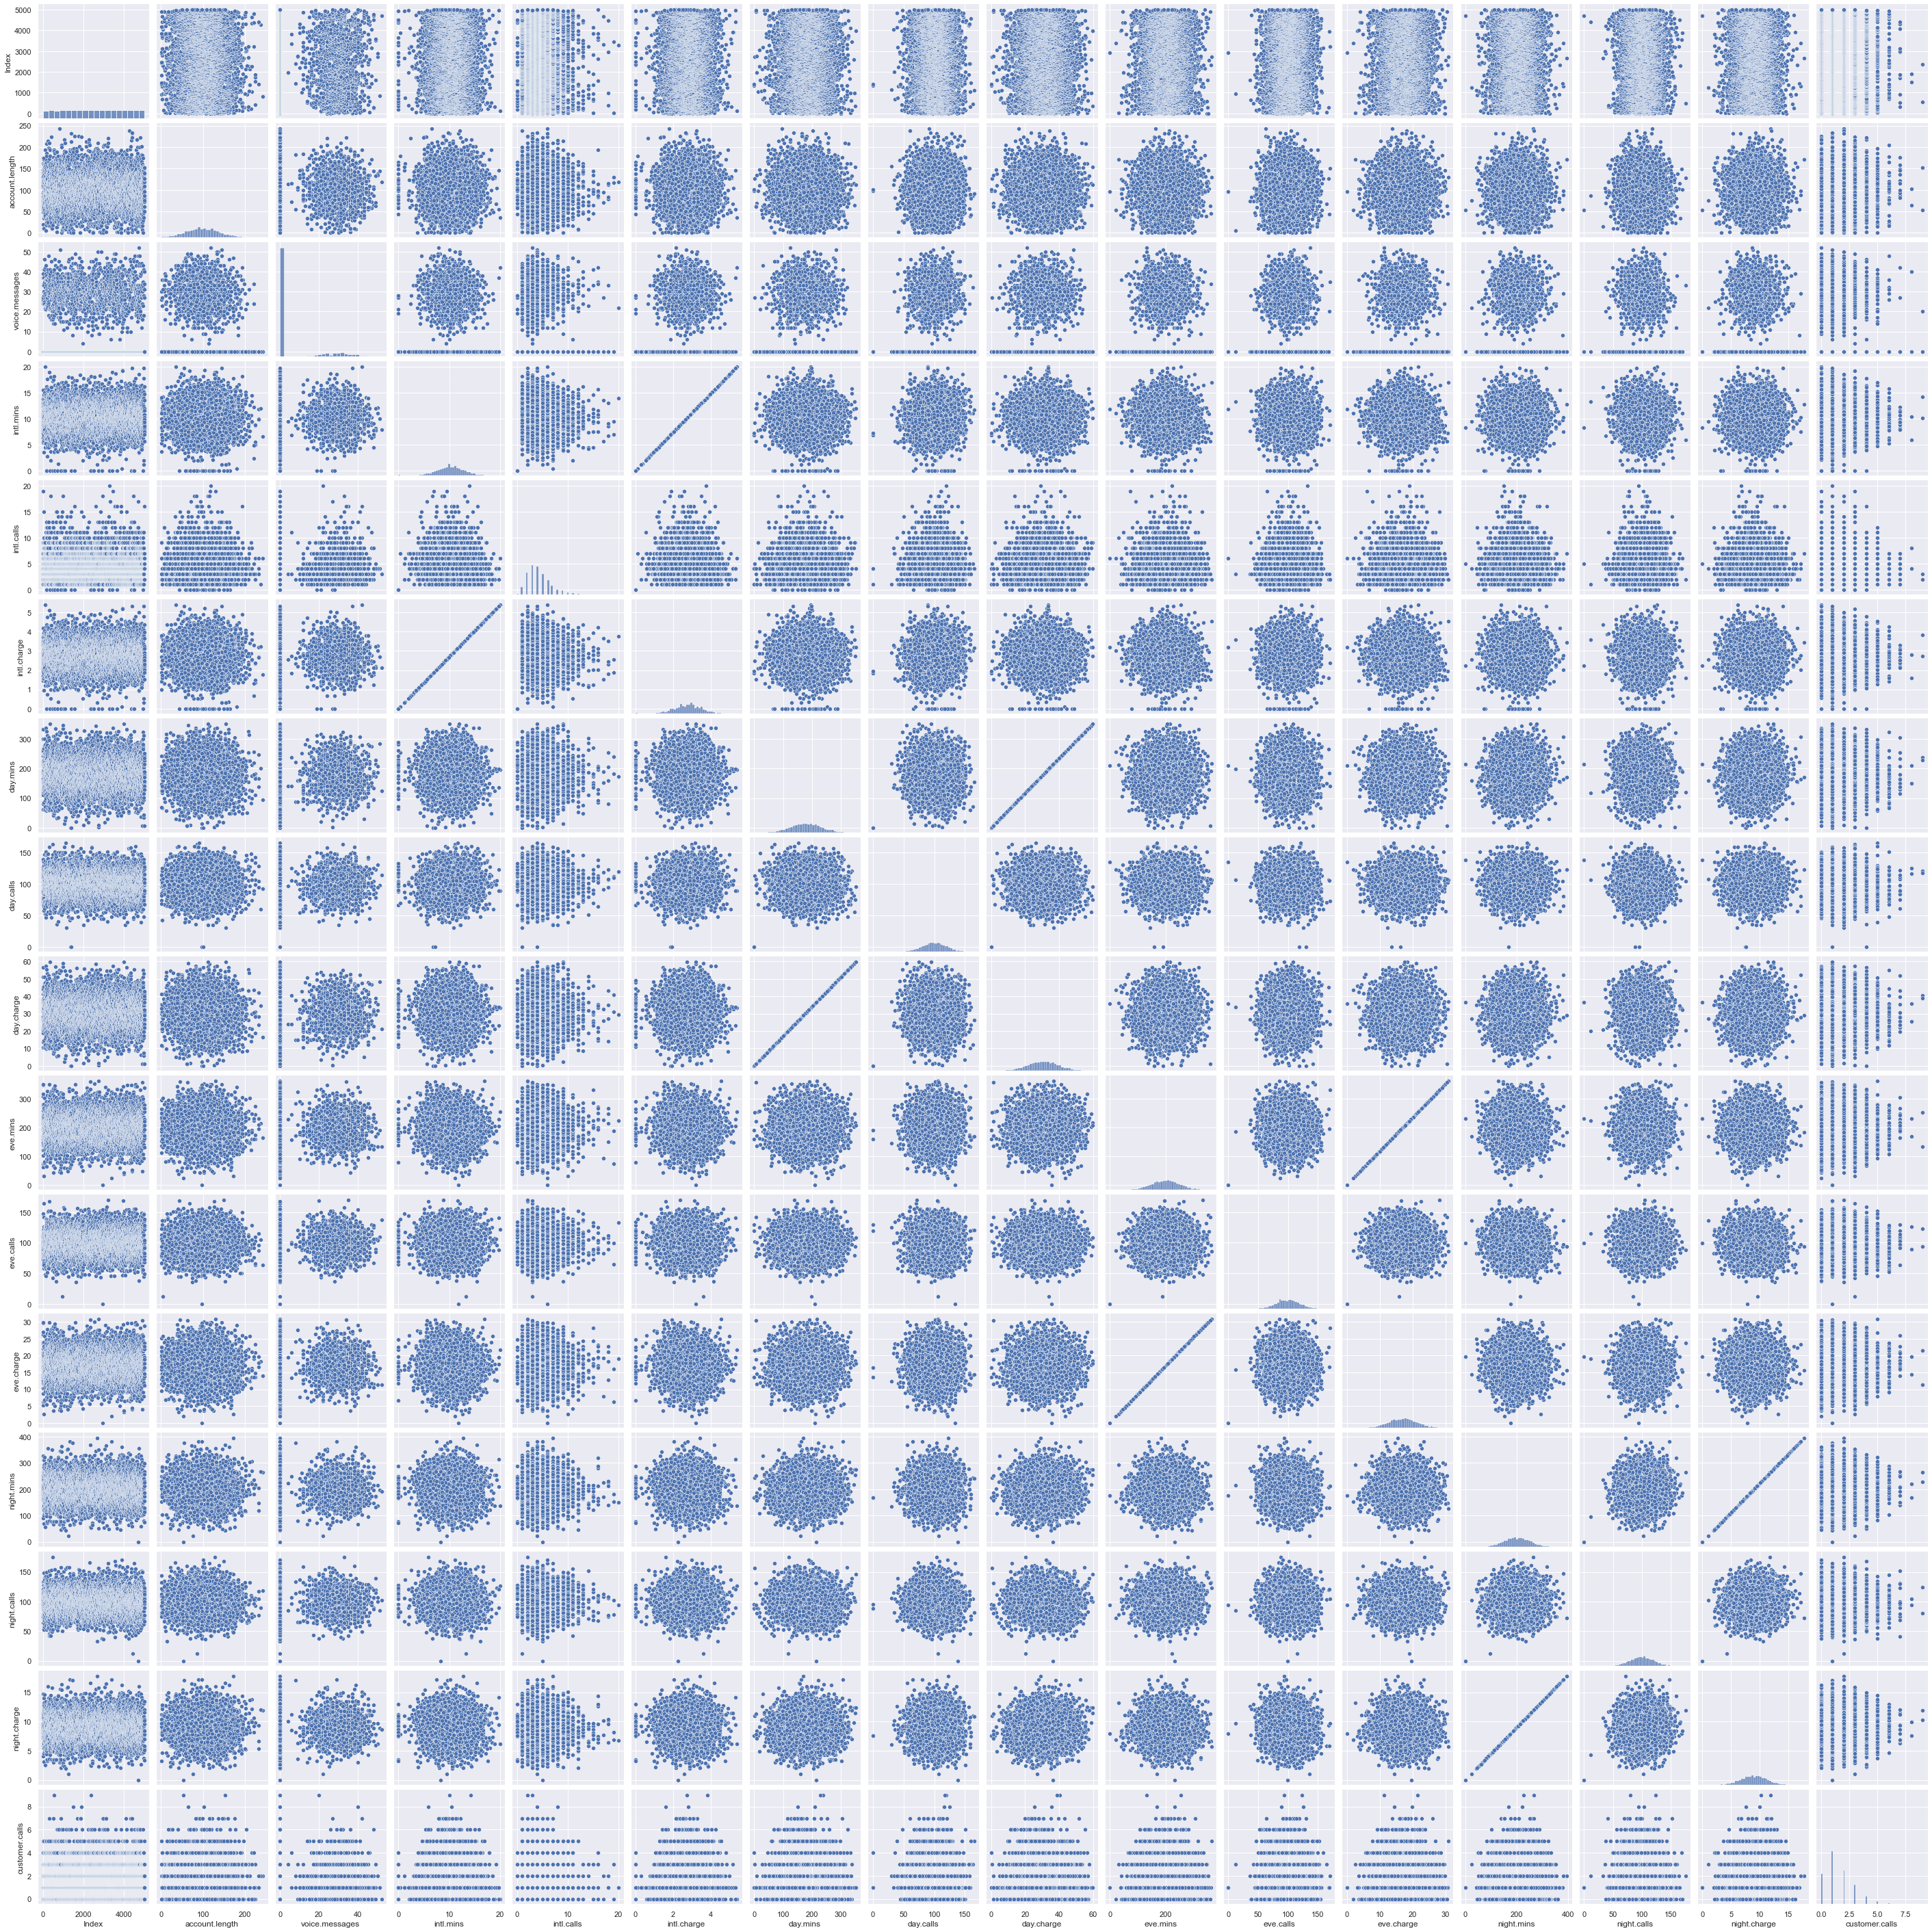

In [28]:
sns.pairplot(df)

In [29]:
df['churn'].value_counts()

no     4264
yes     705
Name: churn, dtype: int64

In [30]:
df['state'].value_counts()

WV    158
MN    124
AL    123
ID    119
VA    117
OH    115
WY    115
OR    114
NY    114
TX    113
UT    111
NJ    111
WI    105
MA    103
MI    102
ME    102
MD    102
VT    100
KY     99
MS     99
CT     99
RI     99
IN     98
WA     98
KS     98
MT     97
CO     95
NH     95
MO     93
DE     92
AR     92
SC     91
NM     91
NC     90
AZ     89
FL     89
NV     89
OK     89
TN     88
IL     88
NE     88
DC     87
ND     87
SD     85
HI     85
GA     83
LA     81
PA     77
AK     70
IA     68
CA     52
Name: state, dtype: int64

In [31]:
df['area.code'].value_counts()

area_code_415    2479
area_code_408    1249
area_code_510    1241
Name: area.code, dtype: int64

<AxesSubplot:xlabel='state', ylabel='count'>

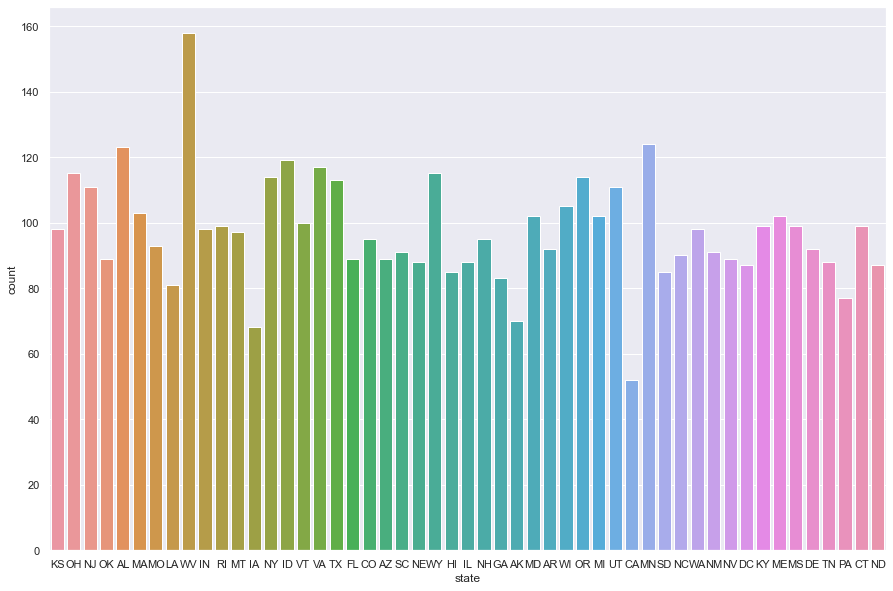

In [32]:
sns.countplot(df['state'])

<AxesSubplot:xlabel='area.code', ylabel='count'>

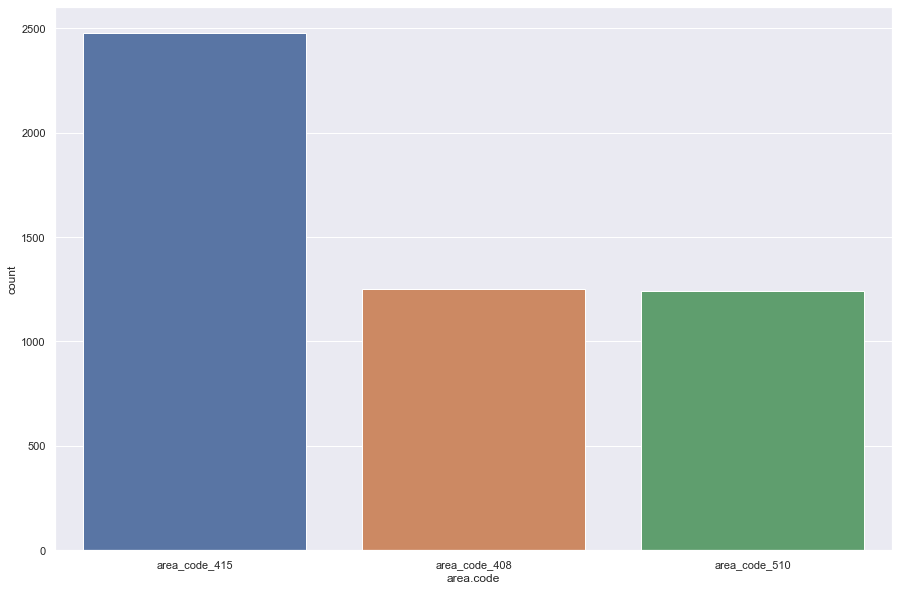

In [33]:
sns.countplot(df['area.code'])

In [34]:
churn = df[df['churn'] == 'yes']
not_churn = df[df['churn'] == 'no']

In [35]:
churn

Index state      area.code  account.length voice.plan  voice.messages  \
10       11    IN  area_code_415              65         no               0   
15       16    NY  area_code_415             161         no               0   
21       22    CO  area_code_408              77         no               0   
33       34    AZ  area_code_408              12         no               0   
41       42    MD  area_code_408             135        yes              41   
...     ...   ...            ...             ...        ...             ...   
4959   4960    NM  area_code_408             137         no               0   
4980   4981    WA  area_code_408              73         no               0   
4990   4991    ND  area_code_510             140         no               0   
4991   4992    AZ  area_code_510              97         no               0   
4996   4997    WV  area_code_415             152         no               0   

     intl.plan  intl.mins  intl.calls  intl.charge  ...  day.calls  \
10          no       12.7           6         3.43  ...        137   
15          no        5.4           9         1.46  ...         67   
21          no        5.7           6         1.54  ...         89   
33          no       11.8           3         3.19  ...        118   
41         yes       14.6          15         3.94  ...         85   
...        ...        ...         ...          ...  ...        ...   
4959       yes       10.6           2         2.86  ...        110   
4980        no       12.3           2         3.32  ...        118   
4990        no        7.5           6         2.03  ...        115   
4991        no        8.8           5         2.38  ...         89   
4996        no       14.7           2         3.97  ...         90   

      day.charge  eve.mins  eve.calls  eve.charge  night.mins  night.calls  \
10         21.95     228.5         83       19.42       208.8          111   
15         56.59     317.8         97       27.01       160.6          128   
21         10.61     169.9        121       14.44       209.6           64   
33         42.43     252.4        119       21.45       280.2           90   
41         29.43     203.9        107       17.33       122.2           78   
...          ...       ...        ...         ...         ...          ...   
4959       53.11     231.1         73       19.64       120.1           78   
4980       30.12     270.5         84       22.99       241.8          112   
4990       41.60     258.6        101       21.98       231.3          112   
4991       42.94     340.3         91       28.93       256.5           67   
4996       31.31     256.8         73       21.83       213.6          113   

      night.charge  customer.calls  churn  
10            9.40               4    yes  
15            7.23               4    yes  
21            9.43               5    yes  
33           12.61               1    yes  
41            5.50               0    yes  
...            ...             ...    ...  
4959          5.40               1    yes  
4980         10.88               3    yes  
4990         10.41               1    yes  
4991         11.54               1    yes  
4996          9.61               3    yes  

[705 rows x 21 columns]

In [36]:
not_churn

Index state      area.code  account.length voice.plan  voice.messages  \
0         1    KS  area_code_415             128        yes              25   
1         2    OH  area_code_415             107        yes              26   
2         3    NJ  area_code_415             137         no               0   
3         4    OH  area_code_408              84         no               0   
4         5    OK  area_code_415              75         no               0   
...     ...   ...            ...             ...        ...             ...   
4994   4995    NC  area_code_408              75         no               0   
4995   4996    HI  area_code_408              50        yes              40   
4997   4998    DC  area_code_415              61         no               0   
4998   4999    DC  area_code_510             109         no               0   
4999   5000    VT  area_code_415              86        yes              34   

     intl.plan  intl.mins  intl.calls  intl.charge  ...  day.calls  \
0           no       10.0           3         2.70  ...        110   
1           no       13.7           3         3.70  ...        123   
2           no       12.2           5         3.29  ...        114   
3          yes        6.6           7         1.78  ...         71   
4          yes       10.1           3         2.73  ...        113   
...        ...        ...         ...          ...  ...        ...   
4994        no        6.9           7         1.86  ...        101   
4995        no        9.9           5         2.67  ...        127   
4997        no       13.6           4         3.67  ...         89   
4998        no        8.5           6         2.30  ...         67   
4999        no        9.3          16         2.51  ...        102   

      day.charge  eve.mins  eve.calls  eve.charge  night.mins  night.calls  \
0          45.07     197.4         99       16.78       244.7           91   
1          27.47     195.5        103       16.62       254.4          103   
2          41.38     121.2        110       10.30       162.6          104   
3          50.90      61.9         88        5.26       196.9           89   
4          28.34     148.3        122       12.61       186.9          121   
...          ...       ...        ...         ...         ...          ...   
4994       29.02     193.1        126       16.41       129.1          104   
4995       40.07     223.0        126       18.96       297.5          116   
4997       23.90     172.8        128       14.69       212.4           97   
4998       32.10     171.7         92       14.59       224.4           89   
4999       22.00     267.1        104       22.70       154.8          100   

      night.charge  customer.calls  churn  
0            11.01               1     no  
1            11.45               1     no  
2             7.32               0     no  
3             8.86               2     no  
4             8.41               3     no  
...            ...             ...    ...  
4994          5.81               1     no  
4995         13.39               2     no  
4997          9.56               1     no  
4998         10.10               0     no  
4999          6.97               0     no  

[4264 rows x 21 columns]

In [37]:
churn.describe()

Index  account.length  voice.messages   intl.mins  intl.calls  \
count   705.000000      705.000000      705.000000  705.000000  705.000000   
mean   2531.768794      102.286525        4.470922   10.685532    4.151773   
std    1399.085337       39.440226       11.280618    2.793873    2.553618   
min      11.000000        1.000000        0.000000    0.000000    0.000000   
25%    1377.000000       76.000000        0.000000    8.800000    2.000000   
50%    2568.000000      102.000000        0.000000   10.600000    4.000000   
75%    3682.000000      126.000000        0.000000   12.800000    5.000000   
max    4997.000000      225.000000       48.000000   20.000000   20.000000   

       intl.charge    day.mins   day.calls  day.charge    eve.mins  \
count   705.000000  705.000000  705.000000  705.000000  705.000000   
mean      2.885589  207.886099  100.805674   35.341064  211.693617   
std       0.754249   68.647123   20.758021   11.670205   51.623121   
min       0.000000    0.000000    0.000000    0.000000   70.900000   
25%       2.380000  153.400000   88.000000   26.080000  175.800000   
50%       2.860000  215.900000  101.000000   36.700000  211.000000   
75%       3.460000  266.600000  115.000000   45.320000  249.300000   
max       5.400000  351.500000  165.000000   59.760000  363.700000   

        eve.calls  eve.charge  night.mins  night.calls  night.charge  \
count  705.000000  705.000000  705.000000   705.000000    705.000000   
mean    99.904965   17.994099  206.086667    99.624113      9.273986   
std     19.642133    4.387902   49.755075    19.961162      2.239022   
min     48.000000    6.030000   47.400000    42.000000      2.130000   
25%     86.000000   14.940000  171.700000    85.000000      7.730000   
50%     99.000000   17.940000  206.300000   100.000000      9.280000   
75%    114.000000   21.190000  241.000000   114.000000     10.850000   
max    168.000000   30.910000  381.600000   158.000000     17.170000   

       customer.calls  
count      705.000000  
mean         2.258156  
std          1.817300  
min          0.000000  
25%          1.000000  
50%          2.000000  
75%          4.000000  
max          9.000000

In [38]:
not_churn.describe()

Index  account.length  voice.messages    intl.mins   intl.calls  \
count  4264.000000     4264.000000     4264.000000  4264.000000  4264.000000   
mean   2504.679878       99.862805        8.297842    10.194536     4.479597   
std    1446.499764       39.731632       13.810807     2.750810     2.440770   
min       1.000000        1.000000        0.000000     0.000000     0.000000   
25%    1238.750000       73.000000        0.000000     8.500000     3.000000   
50%    2504.500000       99.000000        0.000000    10.300000     4.000000   
75%    3763.250000      127.000000       20.000000    12.000000     6.000000   
max    5000.000000      243.000000       52.000000    19.700000    19.000000   

       intl.charge     day.mins    day.calls   day.charge     eve.mins  \
count  4264.000000  4264.000000  4264.000000  4264.000000  4264.000000   
mean      2.753046   175.746177    99.892355    29.877425   198.786046   
std       0.742657    49.646482    19.678876     8.439833    50.142009   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.300000   142.900000    87.000000    24.290000   164.500000   
50%       2.780000   178.000000   100.000000    30.260000   199.600000   
75%       3.240000   210.700000   113.000000    35.820000   232.300000   
max       5.320000   315.600000   163.000000    53.650000   361.800000   

         eve.calls   eve.charge   night.mins  night.calls  night.charge  \
count  4264.000000  4264.000000  4264.000000  4264.000000   4264.000000   
mean    100.219512    16.897045   199.500188   100.009146      8.977622   
std      19.866978     4.262066    50.599804    19.960474      2.276995   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%      87.000000    13.980000   166.000000    87.000000      7.470000   
50%     101.000000    16.970000   199.100000   100.000000      8.960000   
75%     113.000000    19.750000   233.325000   113.000000     10.500000   
max     170.000000    30.750000   395.000000   175.000000     17.770000   

       customer.calls  
count     4264.000000  
mean         1.458490  
std          1.164477  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          2.000000  
max          8.000000

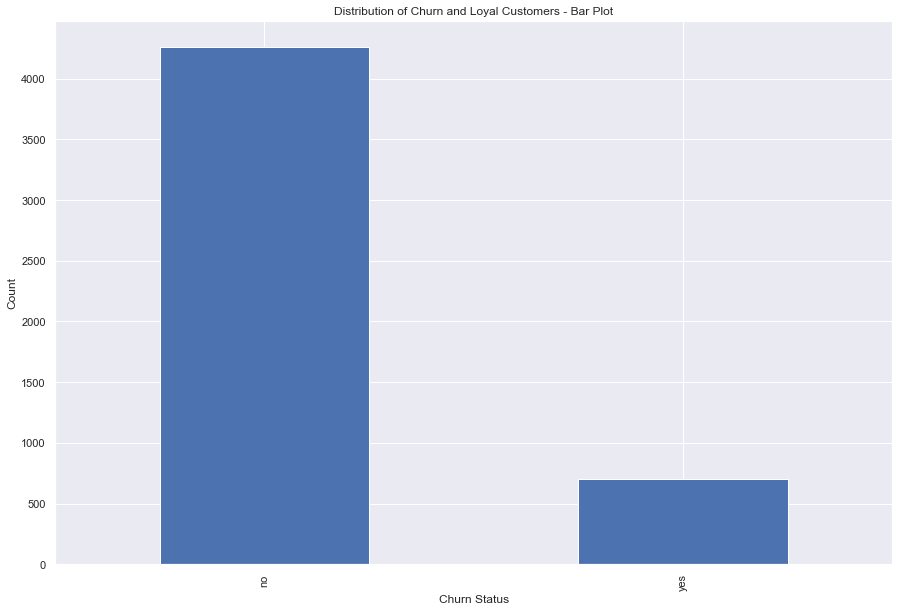

In [39]:
#visulaization

df['churn'].value_counts().plot(kind='bar')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Distribution of Churn and Loyal Customers - Bar Plot')
plt.show()



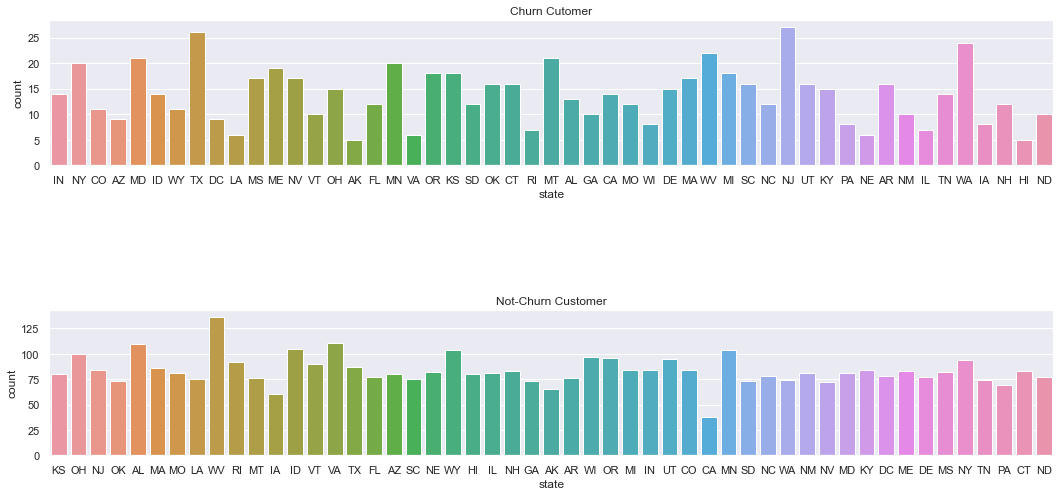

In [40]:
plt.figure(figsize=(18,8))
plt.subplot(2,1,1)
plt.title("Churn Cutomer")
sns.countplot(churn['state'])
plt.subplot(2,1,2)
plt.title("Not-Churn Customer")
sns.countplot(not_churn['state'])
plt.subplots_adjust(hspace=1)

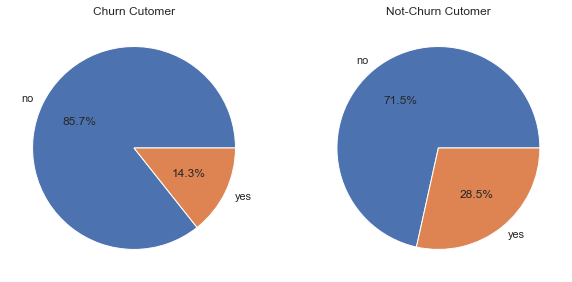

In [41]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Churn Cutomer")
plt.pie(churn['voice.plan'].value_counts(), labels=['no','yes'], autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title("Not-Churn Cutomer")
plt.pie(not_churn['voice.plan'].value_counts(), labels=['no','yes'], autopct='%1.1f%%')
plt.subplots_adjust(hspace=1)

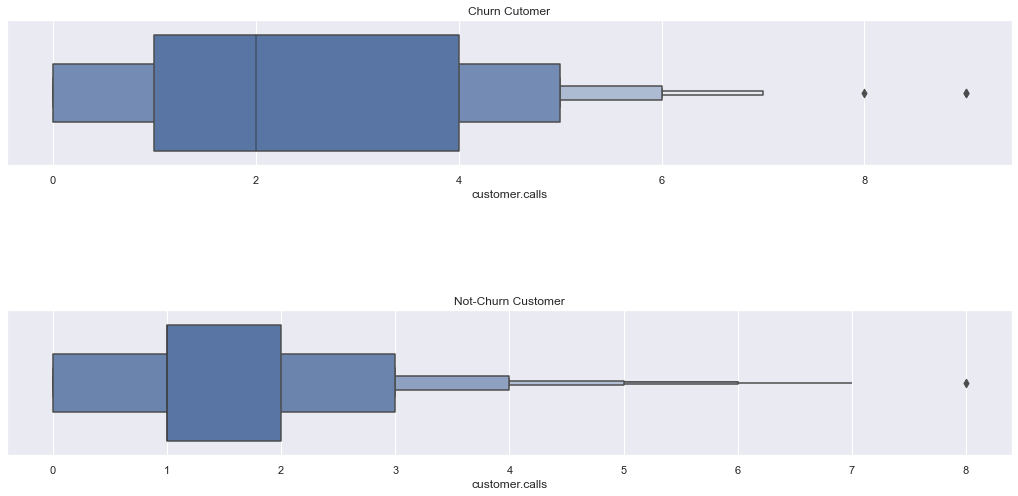

In [42]:
plt.figure(figsize=(18,8))
plt.subplot(2,1,1)
plt.title("Churn Cutomer")
sns.boxenplot(churn['customer.calls'])
plt.subplot(2,1,2)
plt.title("Not-Churn Customer")
sns.boxenplot(not_churn['customer.calls'])
plt.subplots_adjust(hspace=1)

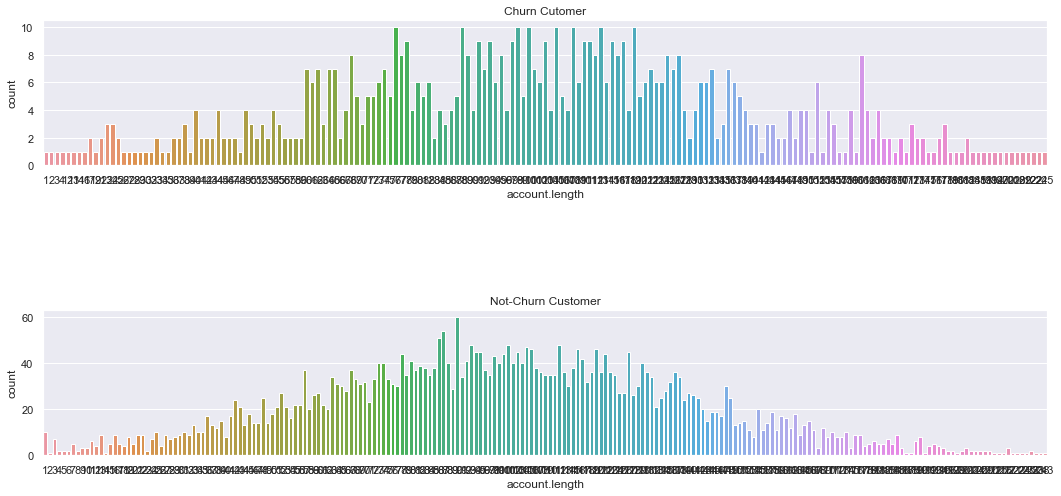

In [43]:
plt.figure(figsize=(18,8))
plt.subplot(2,1,1)
plt.title("Churn Cutomer")
sns.countplot(churn['account.length'])
plt.subplot(2,1,2)
plt.title("Not-Churn Customer")
sns.countplot(not_churn['account.length'])
plt.subplots_adjust(hspace=1)

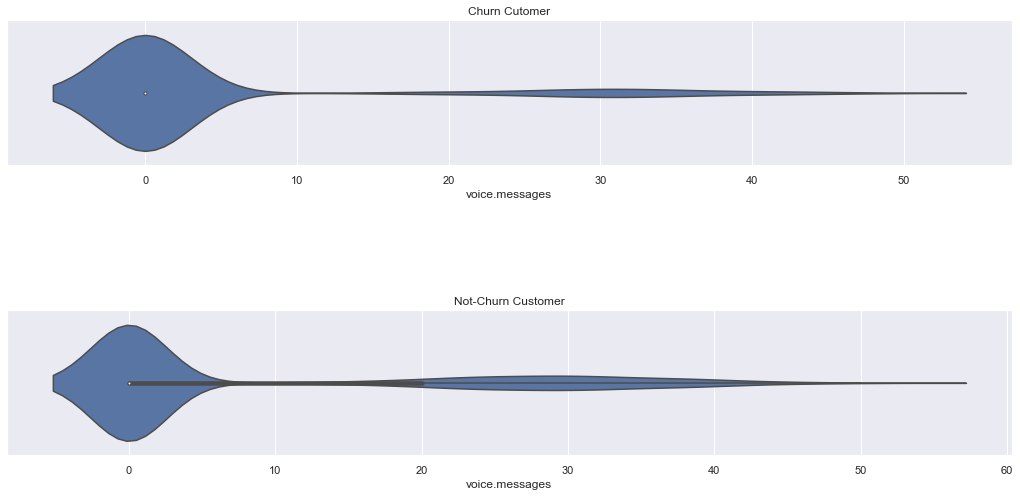

In [44]:
plt.figure(figsize=(18,8))
plt.subplot(2,1,1)
plt.title("Churn Cutomer")
sns.violinplot(churn['voice.messages'])
plt.subplot(2,1,2)
plt.title("Not-Churn Customer")
sns.violinplot(not_churn['voice.messages'])
plt.subplots_adjust(hspace=1)

Text(0.5, 1.0, 'NON-CHURN CUSTOMER')

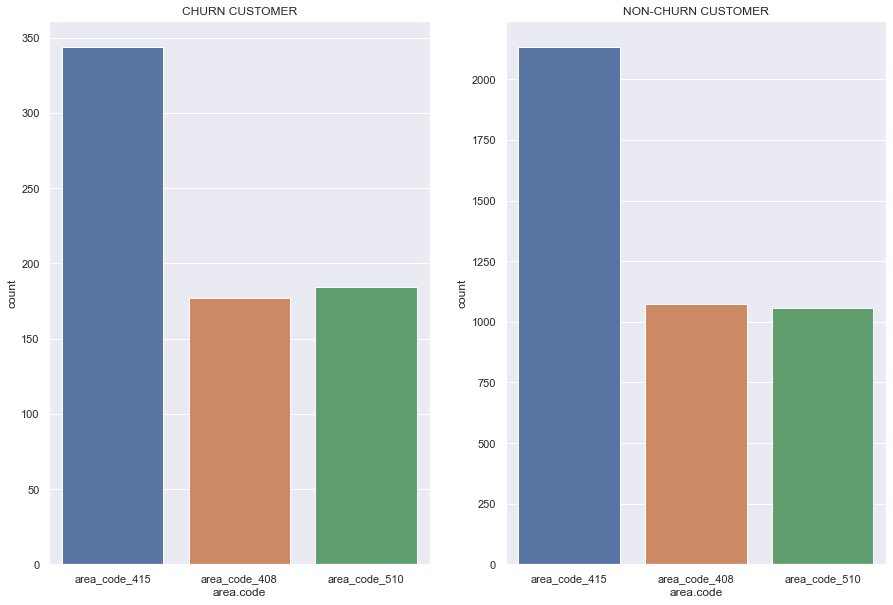

In [45]:
plt.subplot(1,2,1)
sns.countplot(churn["area.code"])
plt.title("CHURN CUSTOMER")
plt.subplot(1,2,2)
sns.countplot(not_churn["area.code"])
plt.title("NON-CHURN CUSTOMER")

In [46]:
df.drop(columns=['state', 'area.code'], inplace=True)

In [47]:
df

Index  account.length voice.plan  voice.messages intl.plan  intl.mins  \
0         1             128        yes              25        no       10.0   
1         2             107        yes              26        no       13.7   
2         3             137         no               0        no       12.2   
3         4              84         no               0       yes        6.6   
4         5              75         no               0       yes       10.1   
...     ...             ...        ...             ...       ...        ...   
4995   4996              50        yes              40        no        9.9   
4996   4997             152         no               0        no       14.7   
4997   4998              61         no               0        no       13.6   
4998   4999             109         no               0        no        8.5   
4999   5000              86        yes              34        no        9.3   

      intl.calls  intl.charge  day.mins  day.calls  day.charge  eve.mins  \
0              3         2.70     265.1        110       45.07     197.4   
1              3         3.70     161.6        123       27.47     195.5   
2              5         3.29     243.4        114       41.38     121.2   
3              7         1.78     299.4         71       50.90      61.9   
4              3         2.73     166.7        113       28.34     148.3   
...          ...          ...       ...        ...         ...       ...   
4995           5         2.67     235.7        127       40.07     223.0   
4996           2         3.97     184.2         90       31.31     256.8   
4997           4         3.67     140.6         89       23.90     172.8   
4998           6         2.30     188.8         67       32.10     171.7   
4999          16         2.51     129.4        102       22.00     267.1   

      eve.calls  eve.charge  night.mins  night.calls  night.charge  \
0            99       16.78       244.7           91         11.01   
1           103       16.62       254.4          103         11.45   
2           110       10.30       162.6          104          7.32   
3            88        5.26       196.9           89          8.86   
4           122       12.61       186.9          121          8.41   
...         ...         ...         ...          ...           ...   
4995        126       18.96       297.5          116         13.39   
4996         73       21.83       213.6          113          9.61   
4997        128       14.69       212.4           97          9.56   
4998         92       14.59       224.4           89         10.10   
4999        104       22.70       154.8          100          6.97   

      customer.calls churn  
0                  1    no  
1                  1    no  
2                  0    no  
3                  2    no  
4                  3    no  
...              ...   ...  
4995               2    no  
4996               3   yes  
4997               1    no  
4998               0    no  
4999               0    no  

[4969 rows x 19 columns]

In [48]:
Le=LabelEncoder()

In [49]:
df['voice.plan']=Le.fit_transform(df['voice.plan'])
df['intl.plan']=Le.fit_transform(df['intl.plan'])
df['churn']=Le.fit_transform(df['churn'])

In [50]:
df

Index  account.length  voice.plan  voice.messages  intl.plan  intl.mins  \
0         1             128           1              25          0       10.0   
1         2             107           1              26          0       13.7   
2         3             137           0               0          0       12.2   
3         4              84           0               0          1        6.6   
4         5              75           0               0          1       10.1   
...     ...             ...         ...             ...        ...        ...   
4995   4996              50           1              40          0        9.9   
4996   4997             152           0               0          0       14.7   
4997   4998              61           0               0          0       13.6   
4998   4999             109           0               0          0        8.5   
4999   5000              86           1              34          0        9.3   

      intl.calls  intl.charge  day.mins  day.calls  day.charge  eve.mins  \
0              3         2.70     265.1        110       45.07     197.4   
1              3         3.70     161.6        123       27.47     195.5   
2              5         3.29     243.4        114       41.38     121.2   
3              7         1.78     299.4         71       50.90      61.9   
4              3         2.73     166.7        113       28.34     148.3   
...          ...          ...       ...        ...         ...       ...   
4995           5         2.67     235.7        127       40.07     223.0   
4996           2         3.97     184.2         90       31.31     256.8   
4997           4         3.67     140.6         89       23.90     172.8   
4998           6         2.30     188.8         67       32.10     171.7   
4999          16         2.51     129.4        102       22.00     267.1   

      eve.calls  eve.charge  night.mins  night.calls  night.charge  \
0            99       16.78       244.7           91         11.01   
1           103       16.62       254.4          103         11.45   
2           110       10.30       162.6          104          7.32   
3            88        5.26       196.9           89          8.86   
4           122       12.61       186.9          121          8.41   
...         ...         ...         ...          ...           ...   
4995        126       18.96       297.5          116         13.39   
4996         73       21.83       213.6          113          9.61   
4997        128       14.69       212.4           97          9.56   
4998         92       14.59       224.4           89         10.10   
4999        104       22.70       154.8          100          6.97   

      customer.calls  churn  
0                  1      0  
1                  1      0  
2                  0      0  
3                  2      0  
4                  3      0  
...              ...    ...  
4995               2      0  
4996               3      1  
4997               1      0  
4998               0      0  
4999               0      0  

[4969 rows x 19 columns]

In [51]:
df_final=df.drop(['intl.charge','day.charge','eve.charge','night.charge'], axis=1)
df_final

Index  account.length  voice.plan  voice.messages  intl.plan  intl.mins  \
0         1             128           1              25          0       10.0   
1         2             107           1              26          0       13.7   
2         3             137           0               0          0       12.2   
3         4              84           0               0          1        6.6   
4         5              75           0               0          1       10.1   
...     ...             ...         ...             ...        ...        ...   
4995   4996              50           1              40          0        9.9   
4996   4997             152           0               0          0       14.7   
4997   4998              61           0               0          0       13.6   
4998   4999             109           0               0          0        8.5   
4999   5000              86           1              34          0        9.3   

      intl.calls  day.mins  day.calls  eve.mins  eve.calls  night.mins  \
0              3     265.1        110     197.4         99       244.7   
1              3     161.6        123     195.5        103       254.4   
2              5     243.4        114     121.2        110       162.6   
3              7     299.4         71      61.9         88       196.9   
4              3     166.7        113     148.3        122       186.9   
...          ...       ...        ...       ...        ...         ...   
4995           5     235.7        127     223.0        126       297.5   
4996           2     184.2         90     256.8         73       213.6   
4997           4     140.6         89     172.8        128       212.4   
4998           6     188.8         67     171.7         92       224.4   
4999          16     129.4        102     267.1        104       154.8   

      night.calls  customer.calls  churn  
0              91               1      0  
1             103               1      0  
2             104               0      0  
3              89               2      0  
4             121               3      0  
...           ...             ...    ...  
4995          116               2      0  
4996          113               3      1  
4997           97               1      0  
4998           89               0      0  
4999          100               0      0  

[4969 rows x 15 columns]

In [52]:
x=df_final.drop(columns=['churn'])
y=df_final['churn']

In [53]:
x

Index  account.length  voice.plan  voice.messages  intl.plan  intl.mins  \
0         1             128           1              25          0       10.0   
1         2             107           1              26          0       13.7   
2         3             137           0               0          0       12.2   
3         4              84           0               0          1        6.6   
4         5              75           0               0          1       10.1   
...     ...             ...         ...             ...        ...        ...   
4995   4996              50           1              40          0        9.9   
4996   4997             152           0               0          0       14.7   
4997   4998              61           0               0          0       13.6   
4998   4999             109           0               0          0        8.5   
4999   5000              86           1              34          0        9.3   

      intl.calls  day.mins  day.calls  eve.mins  eve.calls  night.mins  \
0              3     265.1        110     197.4         99       244.7   
1              3     161.6        123     195.5        103       254.4   
2              5     243.4        114     121.2        110       162.6   
3              7     299.4         71      61.9         88       196.9   
4              3     166.7        113     148.3        122       186.9   
...          ...       ...        ...       ...        ...         ...   
4995           5     235.7        127     223.0        126       297.5   
4996           2     184.2         90     256.8         73       213.6   
4997           4     140.6         89     172.8        128       212.4   
4998           6     188.8         67     171.7         92       224.4   
4999          16     129.4        102     267.1        104       154.8   

      night.calls  customer.calls  
0              91               1  
1             103               1  
2             104               0  
3              89               2  
4             121               3  
...           ...             ...  
4995          116               2  
4996          113               3  
4997           97               1  
4998           89               0  
4999          100               0  

[4969 rows x 14 columns]

In [54]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: churn, Length: 4969, dtype: int32

In [55]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [57]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3975, 14), (3975,), (994, 14), (994,))

In [58]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [59]:
x_test

Index  account.length  voice.plan  voice.messages  intl.plan  intl.mins  \
4745   4746              78           1              38          0        7.5   
2131   2132              52           1              31          0       11.0   
693     694              92           1              29          0        8.0   
2865   2866              97           1              32          0        8.6   
1960   1961              38           0               0          0       13.9   
...     ...             ...         ...             ...        ...        ...   
1723   1724              80           0               0          0       10.9   
4828   4829             113           0               0          0       12.2   
865     866              52           0               0          0        9.9   
3224   3225             115           0               0          0       12.3   
1764   1765              77           0               0          0        7.5   

      intl.calls  day.mins  day.calls  eve.mins  eve.calls  night.mins  \
4745           7     199.0         96      75.5         93       180.2   
2131           4     142.1         77     193.0         97       253.4   
693            4     155.4        110     188.5        104       254.9   
2865           6      90.0         87     276.3        113       185.2   
1960          11     149.0         92      49.2         78       163.3   
...          ...       ...        ...       ...        ...         ...   
1723           7     149.8        123     276.3         75       241.4   
4828           2     161.1        133     205.3         95        60.3   
865            9     209.8        114     171.3         82       154.6   
3224           4     226.4        101     276.8         60       213.4   
1764           4     245.2         87     254.1         83       239.4   

      night.calls  customer.calls  
4745           78               1  
2131           88               1  
693           118               3  
2865          107               2  
1960           93               0  
...           ...             ...  
1723           75               2  
4828           93               2  
865           119               4  
3224           82               3  
1764           91               0  

[994 rows x 14 columns]

In [60]:
x_train

Index  account.length  voice.plan  voice.messages  intl.plan  intl.mins  \
3110   3111              31           1              28          0       10.6   
336     337              99           0               0          0       10.6   
261     262             151           0               0          0       15.4   
1268   1269             131           0               0          0       10.8   
3573   3574              90           1              22          0       10.4   
...     ...             ...         ...             ...        ...        ...   
4960   4961             128           1              41          0        9.8   
3291   3292             119           1              22          1       13.9   
1678   1679              64           0               0          0        8.9   
2634   2635             102           0               0          0       12.6   
2759   2760             130           0               0          0       12.6   

      intl.calls  day.mins  day.calls  eve.mins  eve.calls  night.mins  \
3110           7     171.8        116     240.7        125       245.5   
336            2     169.2         70     271.5         77       170.2   
261            1     134.5         88     143.1        112       223.9   
1268           7     211.8        115     260.5        102       144.2   
3573           5     187.9        121     209.9        101       256.7   
...          ...       ...        ...       ...        ...         ...   
4960           6     184.8         76     160.6         86       162.0   
3291          20     172.1        119     223.6        133       150.0   
1678           8     145.5        116     228.4        110       273.4   
2634           7     123.1        106     182.0        102       244.6   
2759           9     115.6        129     167.8        104       141.8   

      night.calls  customer.calls  
3110           80               1  
336           104               0  
261            61               1  
1268           96               0  
3573          102               2  
...           ...             ...  
4960          131               2  
3291           94               1  
1678           91               1  
2634           75               2  
2759          124               1  

[3975 rows x 14 columns]

In [61]:
y_test

4745    0
2131    0
693     0
2865    1
1960    0
       ..
1723    0
4828    0
865     0
3224    1
1764    1
Name: churn, Length: 994, dtype: int32

In [62]:
y_train

3110    0
336     0
261     0
1268    0
3573    0
       ..
4960    0
3291    1
1678    0
2634    0
2759    0
Name: churn, Length: 3975, dtype: int32

In [63]:
y_pred = model.predict(x_test)

In [64]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [65]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8490945674044266
Precision: 0.5
Recall: 0.006666666666666667
F1 Score: 0.013157894736842105


In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

y_pred = model.predict(x_test)

In [68]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.5955734406438632
Precision: 0.2236842105263158
Recall: 0.68
F1 Score: 0.3366336633663366


In [69]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
sm = SMOTE(random_state=42)
x_resampled, y_resampled = sm.fit_resample(x_test, y_test)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.5955734406438632
Precision: 0.2236842105263158
Recall: 0.68
F1 Score: 0.3366336633663366


In [72]:
# Model building with raw data

In [73]:
#support vector machine
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [74]:
clf = SVC(kernel="rbf",C=1.0,gamma=0.0001)# gamma is nothing but "a "

clf.fit(x_train , y_train)

y_pred = clf.predict(x_test)

acc = accuracy_score(y_test, y_pred) * 100

print("Accuracy =", acc)

print(classification_report(y_test, y_pred))

Accuracy = 84.90945674044266
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       844
           1       0.00      0.00      0.00       150

    accuracy                           0.85       994
   macro avg       0.42      0.50      0.46       994
weighted avg       0.72      0.85      0.78       994



In [75]:
sm = SMOTE(random_state=42)
x_resampled, y_resampled = sm.fit_resample(x_test , y_test)

clf = SVC(kernel="rbf",gamma=0.0001)# gamma is nothing but "a "

clf.fit(x_test , y_test)

y_pred = clf.predict(x_test)

acc = accuracy_score(y_test, y_pred) * 100

print("Accuracy =", acc)

print(classification_report(y_test, y_pred))

Accuracy = 84.90945674044266
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       844
           1       0.00      0.00      0.00       150

    accuracy                           0.85       994
   macro avg       0.42      0.50      0.46       994
weighted avg       0.72      0.85      0.78       994



In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
num_trees=100
max_features=20
min_samples_split=10
min_samples_leaf=5

In [78]:
model = RandomForestClassifier(n_estimators=num_trees, max_samples=0.8,max_features=max_features,min_samples_split=min_samples_leaf,min_samples_leaf=min_samples_leaf,random_state=8)
model.fit(x_train,y_train)

RandomForestClassifier(max_features=20, max_samples=0.8, min_samples_leaf=5,
                       min_samples_split=5, random_state=8)

In [79]:
pred=model.predict(x_test)

In [80]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       844
           1       0.92      0.77      0.84       150

    accuracy                           0.96       994
   macro avg       0.94      0.88      0.91       994
weighted avg       0.95      0.96      0.95       994



In [81]:
sm = SMOTE(random_state=42)
x_resampled, y_resampled = sm.fit_resample(x_test, y_test)

model = RandomForestClassifier(n_estimators=num_trees, max_samples=0.8,max_features=max_features,random_state=8)
model.fit(x,y)

pred=model.predict(x_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       844
           1       0.46      0.29      0.36       150

    accuracy                           0.84       994
   macro avg       0.67      0.62      0.63       994
weighted avg       0.82      0.84      0.83       994



In [82]:
model1=RandomForestClassifier()
params={
    "n_estimators":[50,70,80,90,100],
    "max_features":[4,5,6,7],
    "criterion":['gini','entropy']
}

In [83]:
gscv=GridSearchCV(model1,params,cv=10)

In [84]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [4, 5, 6, 7],
                         'n_estimators': [50, 70, 80, 90, 100]})

In [85]:
gscv.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [4, 5, 6, 7],
                         'n_estimators': [50, 70, 80, 90, 100]})>

In [86]:
gscv.best_params_

{'criterion': 'entropy', 'max_features': 7, 'n_estimators': 50}

In [87]:
final_model=RandomForestClassifier(criterion="entropy",max_features=6,n_estimators=100)

In [88]:
final_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_features=6)

In [89]:
y_pred=final_model.predict(x_test)

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       844
           1       0.94      0.79      0.86       150

    accuracy                           0.96       994
   macro avg       0.95      0.89      0.92       994
weighted avg       0.96      0.96      0.96       994



In [91]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [92]:
#xgboost
import xgboost as xgb

In [93]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [94]:
# Train the XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic',
                          n_estimators=100,
                          max_depth=6
                         )
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [95]:
# Make predictions on the test set
y_pred = model.predict(x_test)

In [96]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 95.67%


In [97]:
# Evaluate the macro average of the model
macro_avg = f1_score(y_test, y_pred, average='macro')
print("Macro Average: {:.2f}".format(macro_avg))

Macro Average: 0.91


In [101]:
# Calculate the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [102]:
df_finals = df_final[~((df_final < (Q1 - 1.5 * IQR)) | (df_final > (Q3 + 1.5 * IQR))).any(axis=1)]

In [103]:
df_finals

Index  account.length  voice.plan  voice.messages  intl.plan  intl.mins  \
0         1             128           1              25          0       10.0   
1         2             107           1              26          0       13.7   
2         3             137           0               0          0       12.2   
11       12              74           0               0          0        9.1   
13       14              95           0               0          0       12.3   
...     ...             ...         ...             ...        ...        ...   
4993   4994              73           0               0          0       11.5   
4994   4995              75           0               0          0        6.9   
4995   4996              50           1              40          0        9.9   
4997   4998              61           0               0          0       13.6   
4998   4999             109           0               0          0        8.5   

      intl.calls  day.mins  day.calls  eve.mins  eve.calls  night.mins  \
0              3     265.1        110     197.4         99       244.7   
1              3     161.6        123     195.5        103       254.4   
2              5     243.4        114     121.2        110       162.6   
11             5     187.7        127     163.4        148       196.0   
13             5     156.6         88     247.6         75       192.3   
...          ...       ...        ...       ...        ...         ...   
4993           6     177.9         89     131.2         82       186.2   
4994           7     170.7        101     193.1        126       129.1   
4995           5     235.7        127     223.0        126       297.5   
4997           4     140.6         89     172.8        128       212.4   
4998           6     188.8         67     171.7         92       224.4   

      night.calls  customer.calls  churn  
0              91               1      0  
1             103               1      0  
2             104               0      0  
11             94               0      0  
13            115               3      0  
...           ...             ...    ...  
4993           89               3      0  
4994          104               1      0  
4995          116               2      0  
4997           97               1      0  
4998           89               0      0  

[3452 rows x 15 columns]

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3975, 14), (3975,), (994, 14), (994,))

In [110]:
num_trees=100
max_features=20
min_samples_split=10
min_samples_leaf=5

In [111]:
model = RandomForestClassifier(n_estimators=num_trees, max_samples=0.8,max_features=max_features,min_samples_split=min_samples_leaf,min_samples_leaf=min_samples_leaf,random_state=8)
model.fit(x_train,y_train)

RandomForestClassifier(max_features=20, max_samples=0.8, min_samples_leaf=5,
                       min_samples_split=5, random_state=8)

In [112]:
pred=model.predict(x_test)

In [113]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       844
           1       0.92      0.77      0.84       150

    accuracy                           0.96       994
   macro avg       0.94      0.88      0.91       994
weighted avg       0.95      0.96      0.95       994

